In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Ridge를 활용한 규제 선형회귀 확인하기

In [2]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = boston_df.drop("PRICE", axis = 1)
y = boston_df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [3]:
# 릿지 생성
lr_ridge = Ridge(alpha = 10) # alpha는 log scale로 지정(0.01, 0.1, 1, 10, 100,...)
lr_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [5]:
ridge_pred = lr_ridge.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = lr_ridge.score(X_test, y_test)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 24.648
RMSE : 4.965
R2 : 0.664


# degree=3 다항식 생성

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
boston_poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_3 = boston_poly.fit_transform(X_train)
X_test_3 = boston_poly.transform(X_test)

In [8]:
X_train_3.shape, X_test_3.shape

((404, 559), (102, 559))

# Ridge vs LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train_3, y_train)
lr_ridge = Ridge(alpha=10).fit(X_train_3, y_train)

In [11]:
#훈련데이터데 대한 예측
# 훈련 데이터에 대한 예측
from sklearn.metrics import r2_score

lr_train_pred = lr.predict(X_train_3)
ridge_train_pred = lr_ridge.predict(X_train_3)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train, lr_train_pred)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_train_rmse = np.sqrt(ridge_train_mse)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)

print("LinearRegression MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(lr_train_mse, lr_train_rmse, lr_train_r2))
print("Ridge MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(ridge_train_mse, ridge_train_rmse, ridge_train_r2))

LinearRegression MSE : 0.000 / RMSE : 0.000 / R2 : 1.000
Ridge MSE : 3.316 / RMSE : 1.821 / R2 : 0.962


In [13]:
lr.coef_[:5], lr_ridge.coef_[:5]

(array([-7.51886506e-01, -3.80909396e+00, -1.06645442e+00, -2.14848458e-03,
        -4.77764291e-02]),
 array([ 2.63509654e-05,  7.77122414e-05, -3.26009472e-05, -3.61847192e-05,
        -3.56377917e-06]))

In [15]:
# 테스트 세트 확인
lr_test_pred = lr.predict(X_test_3)
ridge_test_pred = lr_ridge.predict(X_test_3)

lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test, lr_test_pred)

ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print("LinearRegression MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(lr_test_mse, lr_test_rmse, lr_test_r2))
print("Ridge MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(ridge_test_mse, ridge_test_rmse, ridge_test_r2))

#degree를 적당히 조절

LinearRegression MSE : 129847.995 / RMSE : 360.344 / R2 : -1769.644
Ridge MSE : 169.674 / RMSE : 13.026 / R2 : -1.314


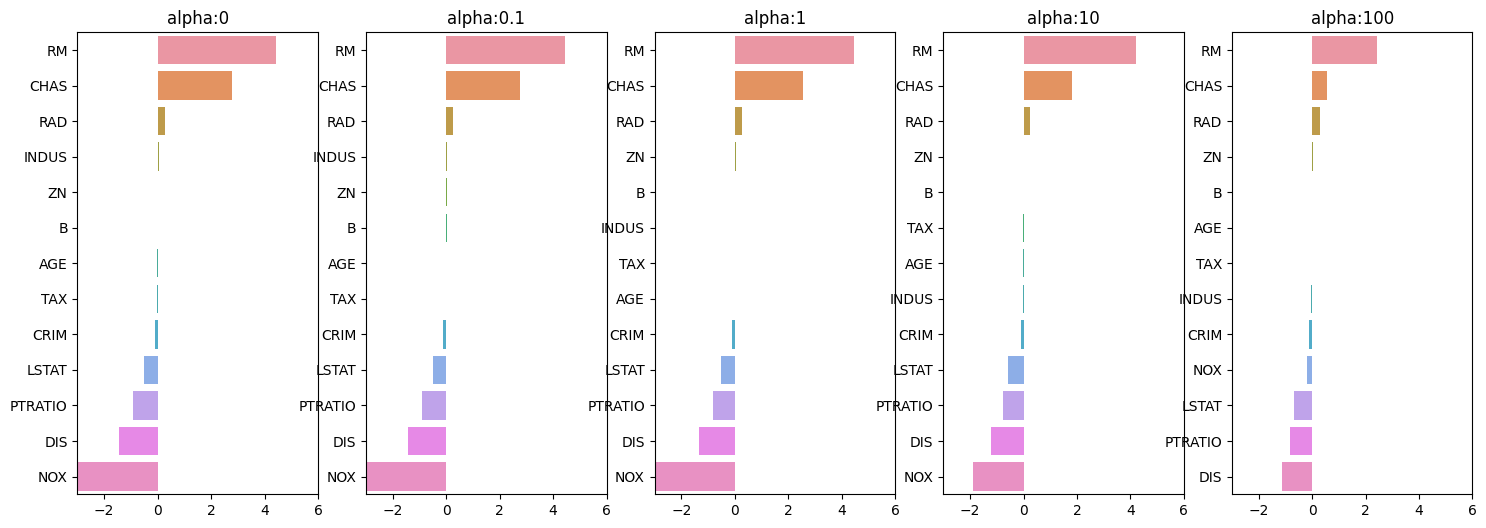

In [16]:
import pandas as pd
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# Lasso를 활용한 규제 선형회귀 확인하기

In [17]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(alpha=10).fit(X_train, y_train)

In [18]:
lasso_pred = lr_lasso.predict(X_test)

mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse, rmse, r2))

MSE : 34.686 / RMSE : 5.889 / R2 : 0.527


In [19]:
lr_lasso.coef_

array([-0.        ,  0.00632092, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.0090727 ,
       -0.        ,  0.00989229, -0.60414765])

In [20]:
lr_lasso = Lasso(alpha=10).fit(X_train_3, y_train)

lasso_pred = lr_lasso.predict(X_test_3)

mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse, rmse, r2))

MSE : 13.241 / RMSE : 3.639 / R2 : 0.819


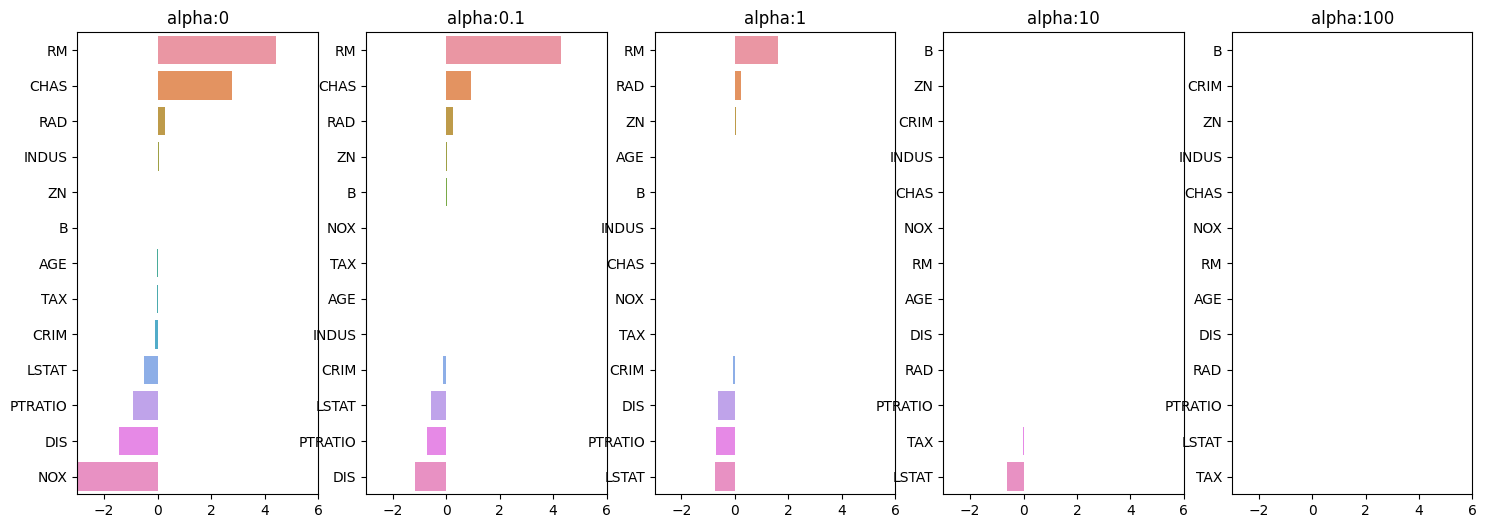

In [21]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=lasso.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()